# Combined Cycle Power Plant Project

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.

The data is available of the UCI Machine Learning Repository

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

data = pd.read_csv('Data_Regression.csv')

In [3]:
data.head(20)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


We have for features:
AT (Ambient Tempreture)
V  (Exhaust Vaccuum)
AP (Ambient Pressure)
RH (Relative Humidity)

We have one Label:
PE (Electrical Energy Output)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


The data has no missing values so there will be no need to for data cleaning

# Exploratory Data Analysis

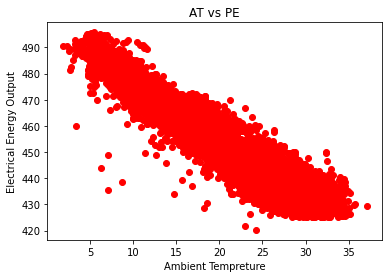

In [5]:
# Relationship between AT and PE
plt.scatter(data['AT'], data['PE'], color = 'red')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Electrical Energy Output')
plt.title('AT vs PE')
plt.show()

There is generally a negative correlation between the variable(AT) and the energy output

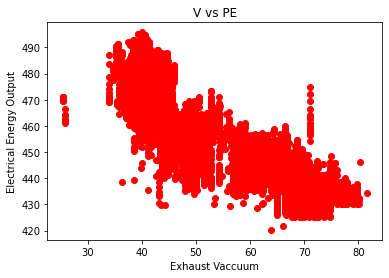

In [6]:
plt.scatter(data['V'], data['PE'], color = 'red')
plt.xlabel('Exhaust Vaccuum')
plt.ylabel('Electrical Energy Output')
plt.title('V vs PE')
plt.show()

There is a generally negative correlation between the vaccuum and the energy output, but there are outliers present

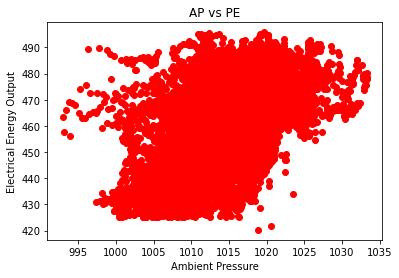

In [7]:
plt.scatter(data['AP'], data['PE'], color = 'red')
plt.xlabel('Ambient Pressure')
plt.ylabel('Electrical Energy Output')
plt.title('AP vs PE')
plt.show()

The hightest energy output is found between AP values of 1010 to 1020 (approx.)

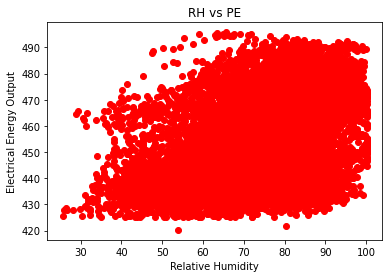

In [8]:
plt.scatter(data['RH'], data['PE'], color = 'red')
plt.xlabel('Relative Humidity')
plt.ylabel('Electrical Energy Output')
plt.title('RH vs PE')
plt.show()

The highest energy output corresponds to RH values between 60 and 70 based of the plot

In [9]:
data['PE'].mean()

454.3650094063554

In [10]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


We will add more EDA 

# Train and Evaulate the Model (RandomForest)

In [11]:
# Have to split the data into X (Matrix of features) and Y(vector of labels)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [12]:
#Do the train test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
#Fit the RandomForest model to the data
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 20 , random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [14]:
#We will print the predicted values and compare them to the actual results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # Set the number of decimal places
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) #Concatinate the predicted and actual values next to each other

[[434.08 431.23]
 [458.05 460.01]
 [462.83 461.14]
 ...
 [469.38 473.26]
 [439.08 438.  ]
 [460.63 463.28]]


In [15]:
#Evaluate the model using the r^2 score
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R^2 Score: {0:.2f} %".format(score*100))

R^2 Score: 96.40 %


In [16]:
from xgboost import XGBRegressor

regressor_x = XGBRegressor()
regressor_x.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
y_pred2 = regressor_x.predict(X_test)
np.set_printoptions(precision=2) # Set the number of decimal places
print(np.concatenate((y_pred.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1)) #Concatinate the predicted and actual values next to each other

[[434.08 431.23]
 [458.05 460.01]
 [462.83 461.14]
 ...
 [469.38 473.26]
 [439.08 438.  ]
 [460.63 463.28]]


In [18]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred2)
print("R^2 Score: {0:.2f} %".format(score*100))

R^2 Score: 96.71 %


In [19]:
# Perform Cross-Validation on the models
from sklearn.model_selection import cross_val_score
kfval_score = cross_val_score(estimator = regressor, X= X_train, y= y_train, cv = 10)
print("K-Fold Cross Validation Accuracy Score Random Forest: {0:.2f} %".format(kfval_score.mean()*100))
print("K-Fold Cross Validation STD Random Forest: {0:.2f} %".format(kfval_score.std()*100))

K-Fold Cross Validation Accuracy Score Random Forest: 95.81 %
K-Fold Cross Validation STD Random Forest: 0.45 %


In [20]:
# Perform Cross-Validation on the models
from sklearn.model_selection import cross_val_score
kfval_score2 = cross_val_score(estimator = regressor_x, X= X_train, y= y_train, cv = 10)
print("K-Fold Cross Validation Accuracy Score XGBoost: {0:.2f} %".format(kfval_score2.mean()*100))
print("K-Fold Cross Validation STD XGBoost: {0:.2f} %".format(kfval_score.std()*100))

K-Fold Cross Validation Accuracy Score XGBoost: 96.46 %
K-Fold Cross Validation STD XGBoost: 0.45 %


From the results we got, the models tested (Random Forest and XGBoost) performed quite well.
RF = 95.81 % and XGB = 94.51%
The models will have to be further tested on more data to see how they perform generally on data they have not seen.

# Testing the models on new data

In the data description, it was specified that the Power Plant data was collectede over six years.
Additionally, the xlsx files contain 5 different spreadsheets of the same number of data entries.
The data was shuffled 5 times using 2-Fold Cross Validation.
I will now train and evaluate the models on the one of the other data sets for comparability.

In [21]:
# load the new data
data2 = pd.read_csv('PowerPlantData2.csv', delimiter = ',')
data2.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [23]:
data2.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# EDA

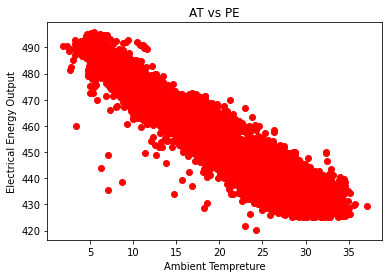

In [24]:
# Relationship between AT and PE
plt.scatter(data2['AT'], data2['PE'], color = 'red')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Electrical Energy Output')
plt.title('AT vs PE')
plt.show()

We still have the same negative correlation as with the first data we used

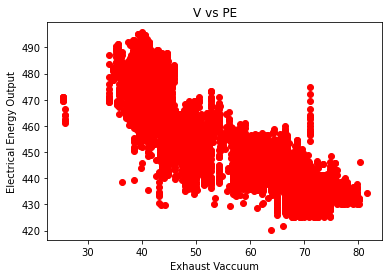

In [25]:
plt.scatter(data2['V'], data2['PE'], color = 'red')
plt.xlabel('Exhaust Vaccuum')
plt.ylabel('Electrical Energy Output')
plt.title('V vs PE')
plt.show()

Same relationship between the two variables

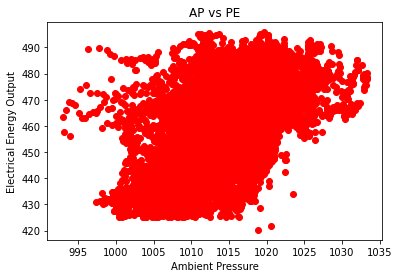

In [26]:
plt.scatter(data2['AP'], data2['PE'], color = 'red')
plt.xlabel('Ambient Pressure')
plt.ylabel('Electrical Energy Output')
plt.title('AP vs PE')
plt.show()

The highest output comes from AP values between 1010 and 1020

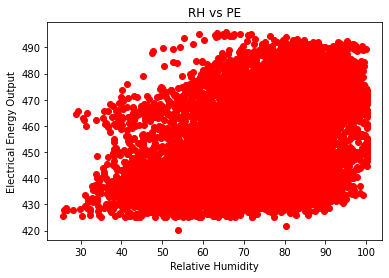

In [27]:
plt.scatter(data2['RH'], data2['PE'], color = 'red')
plt.xlabel('Relative Humidity')
plt.ylabel('Electrical Energy Output')
plt.title('RH vs PE')
plt.show()

Highest outputs between Relative Humidity values between 50 and 60

# Evaluate the models on this data

In [28]:
X = data2.iloc[:, :-1].values
y = data2.iloc[:, -1].values

# Validating the RandomForest Model on the new data
y_pred_test = regressor.predict(X)
np.set_printoptions(precision=2) # Set the number of decimal places
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1), y.reshape(len(y),1)),1)) #Concatinate the predicted and actual values next to each other

[[480.55 480.48]
 [445.33 445.75]
 [437.9  438.76]
 ...
 [464.76 465.96]
 [450.53 450.93]
 [450.65 451.67]]


In [29]:
# R^2 SCore for Random Forest
score_RF = r2_score(y, y_pred_test)
print("R^2 Score: {0:.2f} %".format(score_RF*100))

R^2 Score: 98.77 %


In [30]:
# Cross Validation of Random Forest
kfval_score_RF = cross_val_score(estimator = regressor, X= X, y= y, cv = 10)
print("K-Fold Cross Validation Accuracy Score Random Forest: {0:.2f} %".format(kfval_score_RF.mean()*100))
print("K-Fold Cross Validation STD Random Forest: {0:.2f} %".format(kfval_score_RF.std()*100))

K-Fold Cross Validation Accuracy Score Random Forest: 96.08 %
K-Fold Cross Validation STD Random Forest: 0.60 %


In [31]:
# Testing the XGBoost model on the new data
y_pred_test_2 = regressor_x.predict(X)
np.set_printoptions(precision=2) # Set the number of decimal places
print(np.concatenate((y_pred_test_2.reshape(len(y_pred_test_2),1), y.reshape(len(y),1)),1)) #Concatinate the predicted and actual values next to each other

[[481.53 480.48]
 [445.4  445.75]
 [436.81 438.76]
 ...
 [462.01 465.96]
 [451.5  450.93]
 [448.85 451.67]]


In [32]:
# R^2 Score of XGBoost
score_XGB = r2_score(y, y_pred_test_2)
print("R^2 Score: {0:.2f} %".format(score_XGB*100))

R^2 Score: 98.26 %


In [33]:
# Cross Validation of XBoost
kfval_score_XGB = cross_val_score(estimator = regressor_x, X= X, y= y, cv = 10)
print("K-Fold Cross Validation Accuracy Score XGBoost: {0:.2f} %".format(kfval_score_XGB.mean()*100))
print("K-Fold Cross Validation STD XGBoost: {0:.2f} %".format(kfval_score_XGB.std()*100))

K-Fold Cross Validation Accuracy Score XGBoost: 96.61 %
K-Fold Cross Validation STD XGBoost: 0.57 %


# Test the models by predicting a single value

Random Forest and XGBoost Predictions using the following values:
(I am not sure of the units of the variables)
1. AT = 5
2. V = 40 
3. AP = 1010
4. RH = 55


In [34]:
# Single Preidction on the RandomForest

prediction = regressor.predict([[5, 40, 1010, 55]])
print('Predicted Output Power [kW]')
print(prediction)

Predicted Output Power [kW]
[492.36]


In [35]:
# Single Prediction on XGBoost
prediction_2 = regressor_x.predict([[5, 40, 1010, 55]])
print('Predicted Output Power[kW]')
print(prediction_2)

Predicted Output Power[kW]
[487.55]


In [36]:
print(str(prediction_2[0]) + " kW")

487.54706 kW


The models output results that are expected based on the EDA insights we got.
The RandomForest results are slightly more accurate than the XGBoost

**Save the models using Pickle**

In [37]:
import pickle

# Save the XGBoost Model
pickle.dump(regressor_x, open('xgboost_regressor.pkl', 'wb'))

# Save the Random Forest Model
pickle.dump(regressor, open('random_forest_regressor.pkl', 'wb'))